# <p style="background-color:##4981b3;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Saleprice Prediction with XGBoost Regressor</p>

<!-- <img src="https://github.com/KarnikaKapoor/Files/blob/main/Colorful%20Handwritten%20About%20Me%20Blank%20Education%20Presentation.gif?raw=true"> -->

   <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:##4981b3;font-family:newtimeroman;color:#FFF9ED;font-size:150%;border-radius:10px 10px;">TABLE OF CONTENTS</p>   
    
* [1. IMPORTING LIBRARIES](#1)
    
* [2. LOADING DATA](#2)
    
* [3. DATA CLEANING](#3)
    
* [4. DATA PREPROCESSING](#4)   
    
* [5. DIMENSIONALITY REDUCTION](#5) 
      
* [6. CLUSTERING](#6)
    
* [7. EVALUATING MODELS](#7)
    
* [8. PROFILING](#8)
    
* [9. CONCLUSION](#9)
    
* [10. END](#10)

<a id="1"></a>
# <p style="background-color:##4981b3;font-family:newtimeroman;color:#FFF9ED;font-size:80%;">IMPORTING LIBRARIES</p>

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlflow
import mlflow.sklearn
import mlflow.xgboost
from datetime import datetime
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from mlflow.tracking import MlflowClient

# Set up MLflow tracking

In [69]:
mlflow.set_tracking_uri("http://localhost:5000")  # Replace with your MLflow server URI
mlflow.set_experiment("House Price Prediction lab 10")

<Experiment: artifact_location='s3://saleprice-prediction/mlflow-artifacts/2', creation_time=1731682015836, experiment_id='2', last_update_time=1731682015836, lifecycle_stage='active', name='House Price Prediction lab 10', tags={}>

<a id="2"></a>
# <p style="background-color:##4981b3;font-family:newtimeroman;color:#FFF9ED;font-size:80%;">Loading Training Data</p>

In [70]:
train_data = pd.read_csv('./house-prices-advanced-regression-techniques/train.csv')

In [71]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<a id="3"></a>
# <p style="background-color:##4981b3;font-family:newtimeroman;color:#FFF9ED;font-size:80%;">Training Data Cleaning and Preprocessing</p>

In [72]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [73]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [74]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [75]:
train_data.shape

(1460, 81)

In [76]:
train_data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id', 'GarageYrBlt'], axis=1, inplace = True)

In [77]:
train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].mode()[0])
train_data['BsmtCond']=train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0])
train_data['BsmtQual']=train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0])
train_data['FireplaceQu']=train_data['FireplaceQu'].fillna(train_data['FireplaceQu'].mode()[0])
train_data['GarageType']=train_data['GarageType'].fillna(train_data['GarageType'].mode()[0])
train_data['GarageFinish']=train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0])
train_data['GarageQual']=train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0])
train_data['GarageCond']=train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0])

In [78]:
train_data.shape

(1460, 75)

In [79]:
train_data.isnull().sum().sum()

994

<Axes: >

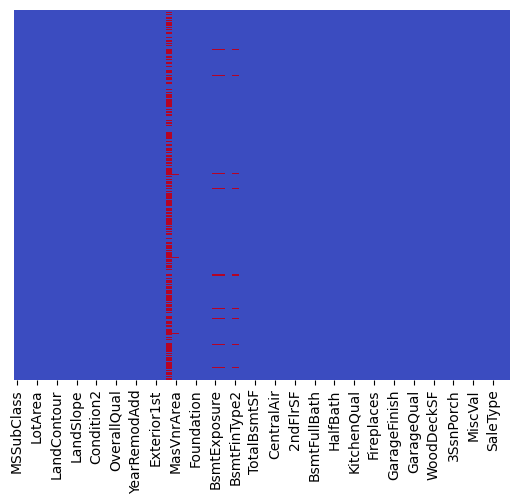

In [80]:
import seaborn as sns
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='coolwarm')

In [81]:
train_data['MasVnrType']=train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0])
train_data['MasVnrArea']=train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mode()[0])
train_data['BsmtExposure']=train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0])
train_data['BsmtFinType2']=train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode()[0])

<Axes: >

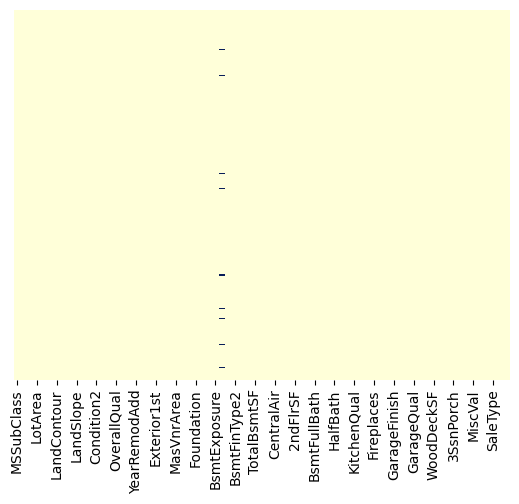

In [82]:
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap='YlGnBu')

In [83]:
train_data.dropna(inplace=True)

In [84]:
train_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


<a id="2"></a>
# <p style="background-color:##4981b3;font-family:newtimeroman;color:#FFF9ED;font-size:80%;">Test Data Loading</p>

In [85]:
test_data = pd.read_csv('./house-prices-advanced-regression-techniques/test.csv')

<a id="2"></a>
# <p style="background-color:##4981b3;font-family:newtimeroman;color:#FFF9ED;font-size:80%;">Test Data Cleaning and Preprocessing</p>

In [86]:
test_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [87]:
test_data.shape

(1459, 80)

In [88]:
test_data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id', 'GarageYrBlt'], axis=1, inplace = True)

In [89]:
test_data['LotFrontage']=test_data['LotFrontage'].fillna(test_data['LotFrontage'].mode()[0])
test_data['BsmtCond']=test_data['BsmtCond'].fillna(test_data['BsmtCond'].mode()[0])
test_data['BsmtQual']=test_data['BsmtQual'].fillna(test_data['BsmtQual'].mode()[0])
test_data['FireplaceQu']=test_data['FireplaceQu'].fillna(test_data['FireplaceQu'].mode()[0])
test_data['GarageType']=test_data['GarageType'].fillna(test_data['GarageType'].mode()[0])
test_data['GarageFinish']=test_data['GarageFinish'].fillna(test_data['GarageFinish'].mode()[0])
test_data['GarageQual']=test_data['GarageQual'].fillna(test_data['GarageQual'].mode()[0])
test_data['GarageCond']=test_data['GarageCond'].fillna(test_data['GarageCond'].mode()[0])
test_data['MasVnrType']=test_data['MasVnrType'].fillna(test_data['MasVnrType'].mode()[0])
test_data['MasVnrArea']=test_data['MasVnrArea'].fillna(test_data['MasVnrArea'].mode()[0])
test_data['BsmtExposure']=test_data['BsmtExposure'].fillna(test_data['BsmtExposure'].mode()[0])
test_data['BsmtFinType2']=test_data['BsmtFinType2'].fillna(test_data['BsmtFinType2'].mode()[0])

In [90]:
test_data.loc[:, test_data.isnull().any()].head()

,MSZoning,Utilities,Exterior1st,Exterior2nd,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,KitchenQual,Functional,GarageCars,GarageArea,SaleType
0,RH,AllPub,VinylSd,VinylSd,Rec,468.0,144.0,270.0,882.0,0.0,0.0,TA,Typ,1.0,730.0,WD
1,RL,AllPub,Wd Sdng,Wd Sdng,ALQ,923.0,0.0,406.0,1329.0,0.0,0.0,Gd,Typ,1.0,312.0,WD
2,RL,AllPub,VinylSd,VinylSd,GLQ,791.0,0.0,137.0,928.0,0.0,0.0,TA,Typ,2.0,482.0,WD
3,RL,AllPub,VinylSd,VinylSd,GLQ,602.0,0.0,324.0,926.0,0.0,0.0,Gd,Typ,2.0,470.0,WD
4,RL,AllPub,HdBoard,HdBoard,ALQ,263.0,0.0,1017.0,1280.0,0.0,0.0,Gd,Typ,2.0,506.0,WD


In [91]:
test_data['Utilities']=test_data['Utilities'].fillna(test_data['Utilities'].mode()[0])
test_data['Exterior1st']=test_data['Exterior1st'].fillna(test_data['Exterior1st'].mode()[0])
test_data['Exterior2nd']=test_data['Exterior2nd'].fillna(test_data['Exterior2nd'].mode()[0])
test_data['BsmtFinType1']=test_data['BsmtFinType1'].fillna(test_data['BsmtFinType1'].mode()[0])
test_data['BsmtFinSF1']=test_data['BsmtFinSF1'].fillna(test_data['BsmtFinSF1'].mean())
test_data['BsmtFinSF2']=test_data['BsmtFinSF2'].fillna(test_data['BsmtFinSF2'].mean())
test_data['BsmtUnfSF']=test_data['BsmtUnfSF'].fillna(test_data['BsmtUnfSF'].mean())
test_data['TotalBsmtSF']=test_data['TotalBsmtSF'].fillna(test_data['TotalBsmtSF'].mean())
test_data['BsmtFullBath']=test_data['BsmtFullBath'].fillna(test_data['BsmtFullBath'].mode()[0])
test_data['BsmtHalfBath']=test_data['BsmtHalfBath'].fillna(test_data['BsmtHalfBath'].mode()[0])
test_data['KitchenQual']=test_data['KitchenQual'].fillna(test_data['KitchenQual'].mode()[0])
test_data['Functional']=test_data['Functional'].fillna(test_data['Functional'].mode()[0])
test_data['GarageCars']=test_data['GarageCars'].fillna(test_data['GarageCars'].mean())
test_data['GarageArea']=test_data['GarageArea'].fillna(test_data['GarageArea'].mean())
test_data['SaleType']=test_data['SaleType'].fillna(test_data['SaleType'].mode()[0])

In [92]:
test_data.shape

(1459, 74)

In [93]:
# Handling Categorical Features
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [94]:
def category_onehot_multcols(multcolumns):
    data_final=final_data
    i=0
    for fields in multcolumns:
        
        print(fields)
        df1=pd.get_dummies(final_data[fields],drop_first=True)
        
        final_data.drop([fields],axis=1,inplace=True)
        if i==0:
            data_final=df1.copy()
        else:
            
            data_final=pd.concat([data_final,df1],axis=1)
        i=i+1
       
        
    data_final=pd.concat([final_data,data_final],axis=1)
        
    return data_final

In [95]:
train_data2 = train_data.copy()

<a id="2"></a>
# <p style="background-color:##4981b3;font-family:newtimeroman;color:#FFF9ED;font-size:80%;">Merging Training and Test Data</p>

In [96]:
final_data=pd.concat([train_data,test_data],axis=0)

In [97]:
final_data['SalePrice']

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454         NaN
1455         NaN
1456         NaN
1457         NaN
1458         NaN
Name: SalePrice, Length: 2881, dtype: float64

In [98]:
final_data.shape

(2881, 75)

In [99]:
final_data=category_onehot_multcols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive


In [100]:
final_data =final_data.loc[:,~final_data.columns.duplicated()]

In [101]:
final_data.shape

(2881, 174)

In [102]:
final_data.isnull().sum().sum()

1459

In [103]:

final_data.info

<bound method DataFrame.info of       MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1454         160         21.0     1936            4            7       1970   
1455         160         21.0     1894            4            5       1970   
1456          20        160.0    20000            5            7       1960   
1457          85         62.0    10441            5            5       1992   
1458          60         74.0     9627            7            5       1993   

      YearRemodAdd 

In [104]:
boolean_columns = ['Min1', 'Min2', 'Typ', 'Attchd', 'Basment', 'BuiltIn', 'CarPort', 'Detchd', 'RFn', 'P']
for col in boolean_columns:
    final_data[col] = final_data[col].astype(int)
    final_data[col] = final_data[col].astype(int)

In [105]:
final_data.dtypes

MSSubClass       int64
LotFrontage    float64
LotArea          int64
OverallQual      int64
OverallCond      int64
                ...   
BuiltIn          int64
CarPort          int64
Detchd           int64
RFn              int64
P                int64
Length: 174, dtype: object

In [106]:
numeric_columns = final_data.select_dtypes(include=['int64', 'float64']).columns
final_data[numeric_columns] = final_data[numeric_columns].astype(float)

In [107]:
final_data.dtypes

MSSubClass     float64
LotFrontage    float64
LotArea        float64
OverallQual    float64
OverallCond    float64
                ...   
BuiltIn        float64
CarPort        float64
Detchd         float64
RFn            float64
P              float64
Length: 174, dtype: object

In [108]:

null_values_before = final_data.isnull().sum().sum()

In [109]:
null_columns = final_data.columns[final_data.isnull().any()].tolist()
print("Columns with null values:")
for col in null_columns:
    print(f"{col}: {final_data[col].isnull().sum()} nulls")

Columns with null values:
SalePrice: 1459 nulls


In [110]:
# Handle remaining null values
for col in null_columns:
    if final_data[col].dtype == 'object':
        # For categorical columns, fill with mode
        final_data[col] = final_data[col].fillna(final_data[col].mode()[0])
    else:
        # For numerical columns, fill with mean
        final_data[col] = final_data[col].fillna(final_data[col].mean())

# Verify all nulls are handled
print("Remaining null values:", final_data.isnull().sum().sum())

Remaining null values: 0


<a id="2"></a>
# <p style="background-color:##4981b3;font-family:newtimeroman;color:#FFF9ED;font-size:80%;">Logging Data Preprocessing Steps and Metrics</p>

In [111]:
with mlflow.start_run(run_name="data_preprocessing") as run:
    # Log dataset info
    mlflow.log_param("dataset_size", len(final_data))
    mlflow.log_param("num_features", final_data.shape[1])
    
    # Log preprocessing steps
    preprocessing_steps = {
        "dropped_columns": ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'Id', 'GarageYrBlt'],
        "filled_null_columns": ["LotFrontage", "BsmtCond", "BsmtQual", "FireplaceQu", 
                              "GarageType", "GarageFinish", "GarageQual", "GarageCond"]
    }
    mlflow.log_dict(preprocessing_steps, "preprocessing_steps.json")
    
    # Log data quality metrics
    data_quality_metrics = {
        "null_values_before": null_values_before,
        "null_values_after": final_data.isnull().sum().sum()
    }
    mlflow.log_metrics(data_quality_metrics)

2024/11/15 18:17:40 INFO mlflow.tracking._tracking_service.client: 🏃 View run data_preprocessing at: http://localhost:5000/#/experiments/2/runs/dcebe491a7e14864b8c7596c9aa271f0.
2024/11/15 18:17:40 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/2.


<a id="2"></a>
# <p style="background-color:##4981b3;font-family:newtimeroman;color:#FFF9ED;font-size:80%;">Data set Spliting</p>

In [112]:
data_train=final_data.iloc[:1422,:]
data_test=final_data.iloc[1422:,:]

In [113]:
data_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [114]:
data_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Min1,Min2,Typ,Attchd,Basment,BuiltIn,CarPort,Detchd,RFn,P
0,20.0,80.0,11622.0,5.0,6.0,1961.0,1961.0,0.0,468.0,144.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20.0,81.0,14267.0,6.0,6.0,1958.0,1958.0,108.0,923.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,60.0,74.0,13830.0,5.0,5.0,1997.0,1998.0,0.0,791.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,60.0,78.0,9978.0,6.0,6.0,1998.0,1998.0,20.0,602.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,120.0,43.0,5005.0,8.0,5.0,1992.0,1992.0,0.0,263.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [115]:
print("'SalePrice' in data_test columns:", 'SalePrice' in data_test.columns)
if 'SalePrice' in data_test.columns:
    data_test = data_test.drop('SalePrice', axis=1)

'SalePrice' in data_test columns: True


In [116]:
X_train=data_train.drop(['SalePrice'],axis=1)
y_train=data_train['SalePrice']

In [117]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'Min1', 'Min2', 'Typ', 'Attchd', 'Basment', 'BuiltIn', 'CarPort',
       'Detchd', 'RFn', 'P'],
      dtype='object', length=173)

In [118]:
y_train

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1422, dtype: float64

<a id="2"></a>
# <p style="background-color:##4981b3;font-family:newtimeroman;color:#FFF9ED;font-size:80%;">XGBoost Regressor Model</p>

In [119]:
import xgboost
regressor=xgboost.XGBRegressor()

In [120]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [121]:
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algo

[CV 3/5] END base_score=0.25, booster=gbtree, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=900;, score=(train=-999.194, test=-18044.457) total time=   1.4s
[CV 1/5] END base_score=0.25, booster=gbtree, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=900;, score=(train=-1048.638, test=-17272.977) total time=   1.4s
[CV 4/5] END base_score=0.25, booster=gbtree, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=900;, score=(train=-969.507, test=-13920.127) total time=   1.5s
[CV 2/5] END base_score=0.25, booster=gbtree, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=900;, score=(train=-892.682, test=-18388.732) total time=   1.7s
[CV 5/5] END base_score=0.25, booster=gbtree, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=900;, score=(train=-1005.779, test=-18478.072) total time=   1.4s
[CV 3/5] END base_score=1, booster=gbtree, learning_rate=0.1, max_depth=10, min_child_weight=3, n_estimators=500;, sco

/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=100;, score=(train=-18686.969, test=-18672.720) total time=   0.4s
[CV 4/5] END base_score=0.75, booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=4, n_estimators=1100;, score=(train=-6540.898, test=-13846.493) total time=   1.3s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END base_score=1, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=4, n_estimators=1500;, score=(train=-0.030, test=-18209.651) total time=   9.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=100;, score=(train=-17541.491, test=-22996.113) total time=   0.4s
[CV 2/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=100;, score=(train=-17929.873, test=-22449.078) total time=   0.4s
[CV 4/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=100;, score=(train=-18527.405, test=-19496.703) total time=   0.3s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END base_score=0.75, booster=gbtree, learning_rate=0.1, max_depth=2, min_child_weight=4, n_estimators=1100;, score=(train=-5938.553, test=-18164.296) total time=   1.4s
[CV 5/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=100;, score=(train=-16848.706, test=-22434.862) total time=   0.3s
[CV 3/5] END base_score=0.25, booster=gbtree, learning_rate=0.15, max_depth=10, min_child_weight=2, n_estimators=100;, score=(train=-603.012, test=-18226.219) total time=   0.9s
[CV 2/5] END base_score=0.25, booster=gbtree, learning_rate=0.15, max_depth=10, min_child_weight=2, n_estimators=100;, score=(train=-306.357, test=-17667.276) total time=   1.0s
[CV 1/5] END base_score=0.25, booster=gbtree, learning_rate=0.15, max_depth=10, min_child_weight=2, n_estimators=100;, score=(train=-320.951, test=-16742.225) total time=   1.2s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END base_score=0.25, booster=gbtree, learning_rate=0.15, max_depth=10, min_child_weight=2, n_estimators=100;, score=(train=-335.449, test=-15339.183) total time=   1.2s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END base_score=0.25, booster=gbtree, learning_rate=0.15, max_depth=10, min_child_weight=2, n_estimators=100;, score=(train=-590.656, test=-18735.883) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=0.5, booster=gblinear, learning_rate=0.1, max_depth=2, min_child_weight=2, n_estimators=1100;, score=(train=-17743.469, test=-18601.964) total time=   2.7s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END base_score=0.5, booster=gblinear, learning_rate=0.1, max_depth=2, min_child_weight=2, n_estimators=1100;, score=(train=-17013.857, test=-21654.066) total time=   3.0s
[CV 3/5] END base_score=0.5, booster=gblinear, learning_rate=0.1, max_depth=2, min_child_weight=2, n_estimators=1100;, score=(train=-16490.818, test=-22338.105) total time=   2.8s
[CV 1/5] END base_score=0.5, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100;, score=(train=-11045.268, test=-15832.024) total time=   0.3s
[CV 2/5] END base_score=0.5, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100;, score=(train=-10684.164, test=-17192.670) total time=   0.4s
[CV 4/5] END base_score=0.5, booster=gblinear, learning_rate=0.1, max_depth=2, min_child_weight=2, n_estimators=1100;, score=(train=-17524.682, test=-19667.816) total time=   2.7s
[CV 3/5] END base_score=0.5, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimat

/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END base_score=0.5, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=3, n_estimators=100;, score=(train=-10742.097, test=-17739.127) total time=   0.4s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=0.5, booster=gblinear, learning_rate=0.15, max_depth=15, min_child_weight=1, n_estimators=500;, score=(train=-17795.114, test=-18455.045) total time=   1.2s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END base_score=0.5, booster=gblinear, learning_rate=0.1, max_depth=2, min_child_weight=2, n_estimators=1100;, score=(train=-15522.517, test=-21482.821) total time=   2.7s
[CV 2/5] END base_score=0.5, booster=gblinear, learning_rate=0.15, max_depth=15, min_child_weight=1, n_estimators=500;, score=(train=-17027.169, test=-21690.321) total time=   1.4s
[CV 3/5] END base_score=0.5, booster=gblinear, learning_rate=0.15, max_depth=15, min_child_weight=1, n_estimators=500;, score=(train=-16545.030, test=-22426.633) total time=   1.3s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END base_score=0.5, booster=gblinear, learning_rate=0.15, max_depth=15, min_child_weight=1, n_estimators=500;, score=(train=-17577.175, test=-19459.260) total time=   1.3s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END base_score=0.5, booster=gblinear, learning_rate=0.15, max_depth=15, min_child_weight=1, n_estimators=500;, score=(train=-15577.583, test=-21429.826) total time=   1.2s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END base_score=1, booster=gblinear, learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=1100;, score=(train=-17013.859, test=-21654.063) total time=   2.3s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=1, booster=gblinear, learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=1100;, score=(train=-17743.470, test=-18601.961) total time=   2.7s
[CV 4/5] END base_score=1, booster=gblinear, learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=1100;, score=(train=-17524.681, test=-19667.815) total time=   2.3s
[CV 3/5] END base_score=1, booster=gblinear, learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=1100;, score=(train=-16490.821, test=-22338.111) total time=   2.6s
[CV 5/5] END base_score=1, booster=gblinear, learning_rate=0.1, max_depth=15, min_child_weight=2, n_estimators=1100;, score=(train=-15522.518, test=-21482.819) total time=   2.7s
[CV 4/5] END base_score=0.5, booster=gbtree, learning_rate=0.1, max_depth=15, min_child_weight=3, n_estimators=1500;, score=(train=-7.357, test=-15573.238) total time=  10.4s
[CV 1/5] END base_score=0.5, booster=gbtree, learning_rate=0.1, max_depth=15, min_child_weight=3, n_estimator

/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END base_score=1, booster=gbtree, learning_rate=0.05, max_depth=10, min_child_weight=2, n_estimators=900;, score=(train=-8.094, test=-17687.992) total time=   8.8s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END base_score=1, booster=gbtree, learning_rate=0.05, max_depth=10, min_child_weight=2, n_estimators=900;, score=(train=-7.904, test=-15351.217) total time=   8.7s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=1, booster=gblinear, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=1500;, score=(train=-17808.185, test=-18484.907) total time=   3.4s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END base_score=1, booster=gblinear, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=1500;, score=(train=-17035.849, test=-21751.528) total time=   2.9s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END base_score=1, booster=gblinear, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=1500;, score=(train=-16541.683, test=-22392.407) total time=   3.0s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=0.25, booster=gblinear, learning_rate=0.15, max_depth=15, min_child_weight=1, n_estimators=500;, score=(train=-17795.114, test=-18455.043) total time=   1.1s
[CV 5/5] END base_score=1, booster=gbtree, learning_rate=0.05, max_depth=10, min_child_weight=2, n_estimators=900;, score=(train=-2.544, test=-18269.091) total time=   6.7s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END base_score=1, booster=gblinear, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=1500;, score=(train=-17601.297, test=-19431.989) total time=   3.3s
[CV 5/5] END base_score=1, booster=gblinear, learning_rate=0.05, max_depth=10, min_child_weight=3, n_estimators=1500;, score=(train=-15575.504, test=-21389.073) total time=   3.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END base_score=0.25, booster=gblinear, learning_rate=0.15, max_depth=15, min_child_weight=1, n_estimators=500;, score=(train=-16545.031, test=-22426.639) total time=   1.1s
[CV 2/5] END base_score=0.25, booster=gblinear, learning_rate=0.15, max_depth=15, min_child_weight=1, n_estimators=500;, score=(train=-17027.168, test=-21690.322) total time=   1.1s
[CV 4/5] END base_score=0.25, booster=gblinear, learning_rate=0.15, max_depth=15, min_child_weight=1, n_estimators=500;, score=(train=-17577.172, test=-19459.259) total time=   1.1s
[CV 5/5] END base_score=0.25, booster=gblinear, learning_rate=0.15, max_depth=15, min_child_weight=1, n_estimators=500;, score=(train=-15577.586, test=-21429.829) total time=   1.0s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:18:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=0.75, booster=gblinear, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=1500;, score=(train=-17682.927, test=-18848.683) total time=   3.0s
[CV 2/5] END base_score=0.75, booster=gblinear, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=1500;, score=(train=-16978.694, test=-21460.178) total time=   3.0s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END base_score=0.75, booster=gblinear, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=1500;, score=(train=-16442.395, test=-22379.299) total time=   2.9s
[CV 4/5] END base_score=0.75, booster=gblinear, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=1500;, score=(train=-17446.686, test=-20085.084) total time=   3.0s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=900;, score=(train=-17765.720, test=-18524.253) total time=   2.0s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=900;, score=(train=-17018.717, test=-21688.892) total time=   1.8s
[CV 5/5] END base_score=0.75, booster=gblinear, learning_rate=0.15, max_depth=5, min_child_weight=3, n_estimators=1500;, score=(train=-15514.127, test=-21756.101) total time=   2.9s
[CV 3/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=900;, score=(train=-16513.071, test=-22373.446) total time=   1.9s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=900;, score=(train=-17549.737, test=-19543.400) total time=   1.9s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=900;, score=(train=-15540.959, test=-21429.585) total time=   2.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=0.5, booster=gblinear, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=1500;, score=(train=-17631.143, test=-18966.300) total time=   2.9s
[CV 2/5] END base_score=0.5, booster=gblinear, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=1500;, score=(train=-16932.346, test=-21455.652) total time=   3.0s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END base_score=0.5, booster=gblinear, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=1500;, score=(train=-16396.571, test=-22394.683) total time=   2.9s
[CV 1/5] END base_score=1, booster=gblinear, learning_rate=0.15, max_depth=10, min_child_weight=1, n_estimators=500;, score=(train=-17795.115, test=-18455.041) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END base_score=0.5, booster=gblinear, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=1500;, score=(train=-17410.577, test=-20176.399) total time=   3.1s
[CV 2/5] END base_score=1, booster=gblinear, learning_rate=0.15, max_depth=10, min_child_weight=1, n_estimators=500;, score=(train=-17027.166, test=-21690.320) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END base_score=1, booster=gblinear, learning_rate=0.15, max_depth=10, min_child_weight=1, n_estimators=500;, score=(train=-16545.032, test=-22426.637) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END base_score=0.5, booster=gblinear, learning_rate=0.2, max_depth=5, min_child_weight=2, n_estimators=1500;, score=(train=-15520.564, test=-21836.632) total time=   2.9s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END base_score=1, booster=gblinear, learning_rate=0.15, max_depth=10, min_child_weight=1, n_estimators=500;, score=(train=-17577.173, test=-19459.260) total time=   1.1s
[CV 5/5] END base_score=1, booster=gblinear, learning_rate=0.15, max_depth=10, min_child_weight=1, n_estimators=500;, score=(train=-15577.588, test=-21429.832) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=0.5, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=3, n_estimators=1100;, score=(train=-17892.389, test=-18370.849) total time=   2.3s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END base_score=0.5, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=3, n_estimators=1100;, score=(train=-17076.627, test=-21818.547) total time=   2.2s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=100;, score=(train=-18228.569, test=-18231.390) total time=   0.3s
[CV 3/5] END base_score=0.5, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=3, n_estimators=1100;, score=(train=-16652.548, test=-22520.499) total time=   2.3s
[CV 4/5] END base_score=0.5, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=3, n_estimators=1100;, score=(train=-17703.959, test=-19303.450) total time=   2.3s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=100;, score=(train=-17374.942, test=-21818.012) total time=   0.3s
[CV 3/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=100;, score=(train=-17012.489, test=-22577.263) total time=   0.3s
[CV 4/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=100;, score=(train=-18099.287, test=-19113.235) total time=   0.4s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=1, n_estimators=100;, score=(train=-16445.096, test=-22141.186) total time=   0.3s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END base_score=0.5, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=3, n_estimators=1100;, score=(train=-15680.299, test=-21421.253) total time=   2.2s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=1, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=500;, score=(train=-17887.876, test=-18289.983) total time=   1.1s
[CV 2/5] END base_score=1, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=500;, score=(train=-17064.206, test=-21760.711) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END base_score=1, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=500;, score=(train=-16649.144, test=-22546.682) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END base_score=1, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=500;, score=(train=-17698.099, test=-19231.956) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END base_score=1, booster=gblinear, learning_rate=0.1, max_depth=10, min_child_weight=2, n_estimators=500;, score=(train=-15692.055, test=-21454.673) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=0.25, booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=1500;, score=(train=-17719.634, test=-18709.351) total time=   3.0s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END base_score=0.25, booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=1500;, score=(train=-17005.382, test=-21568.453) total time=   3.0s
[CV 3/5] END base_score=0.25, booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=1500;, score=(train=-16469.438, test=-22322.343) total time=   3.1s
[CV 4/5] END base_score=0.25, booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=1500;, score=(train=-17488.577, test=-19858.782) total time=   2.9s
[CV 5/5] END base_score=0.25, booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=1500;, score=(train=-15510.558, test=-21607.724) total time=   3.1s
[CV 1/5] END base_score=0.5, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=1, n_estimators=1100;, score=(train=-7.343, test=-17349.913) total time=  12.6s
[CV 3/5] END base_score=0.5, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=1, n

/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=900;, score=(train=-17765.720, test=-18524.253) total time=   1.9s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END base_score=0.5, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=1, n_estimators=1100;, score=(train=-7.343, test=-17264.336) total time=  16.2s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=900;, score=(train=-17018.717, test=-21688.892) total time=   1.9s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=900;, score=(train=-16513.071, test=-22373.446) total time=   1.9s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=900;, score=(train=-17549.737, test=-19543.400) total time=   1.9s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=5, min_child_weight=4, n_estimators=900;, score=(train=-15540.959, test=-21429.585) total time=   1.9s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END base_score=0.5, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=1, n_estimators=1100;, score=(train=-7.333, test=-15693.116) total time=  18.2s
[CV 1/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=3, n_estimators=500;, score=(train=-17784.406, test=-18604.145) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=3, n_estimators=500;, score=(train=-17047.107, test=-21640.432) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=3, n_estimators=500;, score=(train=-16533.537, test=-22424.621) total time=   1.1s
[CV 4/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=3, n_estimators=500;, score=(train=-17562.588, test=-19654.282) total time=   1.1s
[CV 1/5] END base_score=0.75, booster=gbtree, learning_rate=0.15, max_depth=2, min_child_weight=3, n_estimators=100;, score=(train=-12741.745, test=-16015.333) total time=   0.3s
[CV 2/5] END base_score=0.75, booster=gbtree, learning_rate=0.15, max_depth=2, min_child_weight=3, n_estimators=100;, score=(train=-12728.748, test=-18735.195) total time=   0.3s
[CV 5/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=3, n_estimators=500;, score=(train=-15567.086, test=-21510.304) total time=   1.1s
[CV 3/5] END base_score=0.75, booster=gbtree, learning_rate=0.15, max_depth=2, min_child_weight=3, n_estimat

/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END base_score=0.5, booster=gbtree, learning_rate=0.2, max_depth=2, min_child_weight=3, n_estimators=500;, score=(train=-6658.389, test=-13839.059) total time=   0.7s
[CV 5/5] END base_score=0.5, booster=gbtree, learning_rate=0.2, max_depth=2, min_child_weight=3, n_estimators=500;, score=(train=-6243.189, test=-18652.561) total time=   0.7s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:41] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=1, booster=gblinear, learning_rate=0.15, max_depth=2, min_child_weight=3, n_estimators=900;, score=(train=-17744.323, test=-18672.331) total time=   1.9s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END base_score=1, booster=gblinear, learning_rate=0.15, max_depth=2, min_child_weight=3, n_estimators=900;, score=(train=-17022.927, test=-21592.519) total time=   1.8s
[CV 3/5] END base_score=1, booster=gblinear, learning_rate=0.15, max_depth=2, min_child_weight=3, n_estimators=900;, score=(train=-16495.737, test=-22381.475) total time=   1.8s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END base_score=1, booster=gblinear, learning_rate=0.15, max_depth=2, min_child_weight=3, n_estimators=900;, score=(train=-17517.022, test=-19823.707) total time=   1.9s
[CV 5/5] END base_score=1, booster=gblinear, learning_rate=0.15, max_depth=2, min_child_weight=3, n_estimators=900;, score=(train=-15527.831, test=-21574.968) total time=   1.9s
[CV 5/5] END base_score=0.5, booster=gbtree, learning_rate=0.15, max_depth=15, min_child_weight=1, n_estimators=1100;, score=(train=-0.035, test=-19468.122) total time=  19.4s
[CV 3/5] END base_score=1, booster=gbtree, learning_rate=0.05, max_depth=15, min_child_weight=2, n_estimators=1100;, score=(train=-0.207, test=-17777.806) total time=  10.6s
[CV 1/5] END base_score=1, booster=gbtree, learning_rate=0.05, max_depth=15, min_child_weight=2, n_estimators=1100;, score=(train=-7.416, test=-16101.549) total time=  14.2s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=500;, score=(train=-17887.873, test=-18289.979) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:19:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=500;, score=(train=-17064.208, test=-21760.717) total time=   1.2s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END base_score=1, booster=gbtree, learning_rate=0.05, max_depth=15, min_child_weight=2, n_estimators=1100;, score=(train=-7.384, test=-17458.576) total time=  16.2s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=500;, score=(train=-16649.141, test=-22546.681) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=500;, score=(train=-17698.098, test=-19231.955) total time=   1.2s
[CV 5/5] END base_score=0.75, booster=gblinear, learning_rate=0.1, max_depth=3, min_child_weight=2, n_estimators=500;, score=(train=-15692.057, test=-21454.673) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END base_score=1, booster=gbtree, learning_rate=0.05, max_depth=15, min_child_weight=2, n_estimators=1100;, score=(train=-7.387, test=-15663.956) total time=  13.8s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=0.25, booster=gblinear, learning_rate=0.2, max_depth=3, min_child_weight=4, n_estimators=500;, score=(train=-17784.400, test=-18604.137) total time=   1.2s
[CV 2/5] END base_score=0.25, booster=gblinear, learning_rate=0.2, max_depth=3, min_child_weight=4, n_estimators=500;, score=(train=-17047.105, test=-21640.429) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END base_score=0.25, booster=gblinear, learning_rate=0.2, max_depth=3, min_child_weight=4, n_estimators=500;, score=(train=-16533.537, test=-22424.621) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END base_score=0.25, booster=gblinear, learning_rate=0.2, max_depth=3, min_child_weight=4, n_estimators=500;, score=(train=-17562.589, test=-19654.285) total time=   1.1s
[CV 5/5] END base_score=0.25, booster=gblinear, learning_rate=0.2, max_depth=3, min_child_weight=4, n_estimators=500;, score=(train=-15567.086, test=-21510.303) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=0.25, booster=gblinear, learning_rate=0.1, max_depth=15, min_child_weight=3, n_estimators=900;, score=(train=-17765.720, test=-18524.250) total time=   1.8s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END base_score=0.25, booster=gblinear, learning_rate=0.1, max_depth=15, min_child_weight=3, n_estimators=900;, score=(train=-17018.717, test=-21688.887) total time=   1.8s
[CV 3/5] END base_score=0.25, booster=gblinear, learning_rate=0.1, max_depth=15, min_child_weight=3, n_estimators=900;, score=(train=-16513.069, test=-22373.443) total time=   1.9s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END base_score=0.25, booster=gblinear, learning_rate=0.1, max_depth=15, min_child_weight=3, n_estimators=900;, score=(train=-17549.737, test=-19543.398) total time=   1.9s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END base_score=1, booster=gbtree, learning_rate=0.05, max_depth=15, min_child_weight=2, n_estimators=1100;, score=(train=-0.138, test=-18875.870) total time=  12.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END base_score=0.25, booster=gblinear, learning_rate=0.1, max_depth=15, min_child_weight=3, n_estimators=900;, score=(train=-15540.957, test=-21429.582) total time=   1.8s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=2, min_child_weight=2, n_estimators=1100;, score=(train=-17699.683, test=-18859.590) total time=   2.2s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=2, min_child_weight=2, n_estimators=1100;, score=(train=-16991.455, test=-21488.310) total time=   2.2s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=2, min_child_weight=2, n_estimators=1100;, score=(train=-16461.068, test=-22426.668) total time=   2.3s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=2, min_child_weight=2, n_estimators=1100;, score=(train=-17462.660, test=-20092.687) total time=   2.2s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=2, min_child_weight=2, n_estimators=1100;, score=(train=-15528.076, test=-21756.211) total time=   2.2s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=2, n_estimators=1100;, score=(train=-17699.683, test=-18859.590) total time=   2.2s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=2, n_estimators=1100;, score=(train=-16991.455, test=-21488.310) total time=   2.3s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=2, n_estimators=1100;, score=(train=-16461.068, test=-22426.668) total time=   2.3s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=2, n_estimators=1100;, score=(train=-17462.660, test=-20092.687) total time=   2.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=0.5, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=4, n_estimators=500;, score=(train=-17784.405, test=-18604.141) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END base_score=0.5, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=4, n_estimators=500;, score=(train=-17047.103, test=-21640.423) total time=   1.1s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END base_score=1, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=2, n_estimators=1100;, score=(train=-15528.076, test=-21756.211) total time=   2.2s
[CV 3/5] END base_score=0.5, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=4, n_estimators=500;, score=(train=-16533.535, test=-22424.623) total time=   1.1s
[CV 4/5] END base_score=0.5, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=4, n_estimators=500;, score=(train=-17562.590, test=-19654.287) total time=   1.2s
[CV 5/5] END base_score=0.5, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=4, n_estimators=500;, score=(train=-15567.087, test=-21510.303) total time=   1.1s
[CV 1/5] END base_score=0.75, booster=gbtree, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=500;, score=(train=-856.261, test=-15733.944) total time=   1.3s
[CV 2/5] END base_score=0.75, booster=gbtree, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estim

/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END base_score=0.75, booster=gbtree, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=500;, score=(train=-851.284, test=-17344.068) total time=   1.5s
[CV 4/5] END base_score=0.75, booster=gbtree, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=500;, score=(train=-797.266, test=-13998.787) total time=   1.4s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 5/5] END base_score=0.75, booster=gbtree, learning_rate=0.1, max_depth=5, min_child_weight=2, n_estimators=500;, score=(train=-938.772, test=-17786.216) total time=   1.5s
[CV 1/5] END base_score=0.5, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=1, n_estimators=500;, score=(train=-18207.760, test=-18414.584) total time=   1.4s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 3/5] END base_score=0.5, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=1, n_estimators=500;, score=(train=-17045.701, test=-22923.689) total time=   1.1s
[CV 2/5] END base_score=0.5, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=1, n_estimators=500;, score=(train=-17402.864, test=-22090.081) total time=   1.2s
[CV 4/5] END base_score=0.5, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=1, n_estimators=500;, score=(train=-18081.806, test=-19184.650) total time=   1.1s
[CV 5/5] END base_score=0.5, booster=gblinear, learning_rate=0.05, max_depth=15, min_child_weight=1, n_estimators=500;, score=(train=-16177.927, test=-21903.798) total time=   1.3s
[CV 1/5] END base_score=0.25, booster=gbtree, learning_rate=0.05, max_depth=10, min_child_weight=2, n_estimators=1100;, score=(train=-7.607, test=-16153.436) total time=   9.7s
[CV 3/5] END base_score=0.25, booster=gbtree, learning_rate=0.05, max_depth=10, min_child_weight=2,

/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:33] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 1/5] END base_score=0.75, booster=gblinear, learning_rate=0.15, max_depth=3, min_child_weight=2, n_estimators=900;, score=(train=-17744.322, test=-18672.333) total time=   1.8s
[CV 4/5] END base_score=0.25, booster=gbtree, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=900;, score=(train=-168.399, test=-13742.727) total time=   2.4s
[CV 5/5] END base_score=0.25, booster=gbtree, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=900;, score=(train=-220.623, test=-18108.676) total time=   2.5s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:34] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 2/5] END base_score=0.75, booster=gblinear, learning_rate=0.15, max_depth=3, min_child_weight=2, n_estimators=900;, score=(train=-17022.929, test=-21592.518) total time=   1.8s
[CV 3/5] END base_score=0.75, booster=gblinear, learning_rate=0.15, max_depth=3, min_child_weight=2, n_estimators=900;, score=(train=-16495.739, test=-22381.472) total time=   1.9s


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:36] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


[CV 4/5] END base_score=0.75, booster=gblinear, learning_rate=0.15, max_depth=3, min_child_weight=2, n_estimators=900;, score=(train=-17517.025, test=-19823.710) total time=   1.9s
[CV 5/5] END base_score=0.25, booster=gbtree, learning_rate=0.05, max_depth=10, min_child_weight=2, n_estimators=1100;, score=(train=-0.439, test=-18523.195) total time=  10.0s
[CV 5/5] END base_score=0.75, booster=gblinear, learning_rate=0.15, max_depth=3, min_child_weight=2, n_estimators=900;, score=(train=-15527.830, test=-21574.971) total time=   2.1s
[CV 1/5] END base_score=0.75, booster=gbtree, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=500;, score=(train=-43.745, test=-16682.488) total time=   5.7s
[CV 2/5] END base_score=0.75, booster=gbtree, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estimators=500;, score=(train=-39.674, test=-17275.965) total time=   5.8s
[CV 3/5] END base_score=0.75, booster=gbtree, learning_rate=0.05, max_depth=10, min_child_weight=1, n_estim

/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:20:59] WARNING: /workspace/src/c_api/c_api.cc:1374: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  warnings.warn(smsg, UserWarning)
2024/11/15 18:21:01 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'house_price_prediction_model' already exists. Creating a new version of this model...
2024/11/15 18:21:02 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: house_price_prediction_model, version 9
Created version '9' of model 'house_price_prediction_model'.
2024/11/15 18:21:02 INFO mlflow.tracking._tracking_service.client: 🏃 View run model_training at: http://localhost:5000/#/experiments/2/runs/92e882e5a7a74f41a1

Best score: -15835.882561378414
Best parameters: {'n_estimators': 1100, 'min_child_weight': 1, 'max_depth': 2, 'learning_rate': 0.1, 'booster': 'gbtree', 'base_score': 0.25}


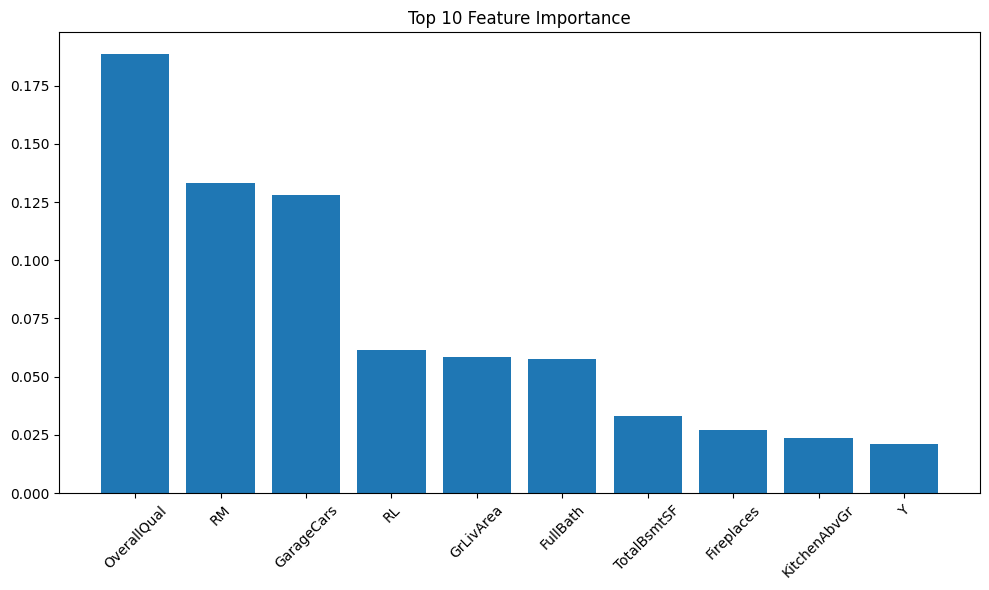

In [122]:
# Keep the RandomizedSearchCV setup
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=2)

# Add these evaluation functions
def evaluate_model(model, X, y):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    mae = mean_absolute_error(y, predictions)
    r2 = r2_score(y, predictions)
    return {"mse": mse, "mae": mae, "r2": r2, "rmse": np.sqrt(mse)}

# Then wrap the training process with MLflow
with mlflow.start_run(run_name="model_training") as run:
    # Log hyperparameter search space
    mlflow.log_dict(hyperparameter_grid, "hyperparameter_grid.json")
    
    # Perform RandomizedSearchCV
    random_cv.fit(X_train, y_train)
    
    # Log best parameters
    mlflow.log_params(random_cv.best_params_)
    
    # Log cross-validation results
    cv_results = {
        "mean_test_score": random_cv.cv_results_['mean_test_score'],
        "std_test_score": random_cv.cv_results_['std_test_score'],
        "mean_train_score": random_cv.cv_results_['mean_train_score'],
        "std_train_score": random_cv.cv_results_['std_train_score']
    }
    mlflow.log_dict(cv_results, "cv_results.json")
    
    # Log best model metrics
    best_model = random_cv.best_estimator_
    train_metrics = evaluate_model(best_model, X_train, y_train)
    mlflow.log_metrics(train_metrics)
    
    # Log feature importance plot
    feature_importance = pd.DataFrame({
        'feature': X_train.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.bar(feature_importance['feature'][:10], feature_importance['importance'][:10])
    plt.xticks(rotation=45)
    plt.title('Top 10 Feature Importance')
    plt.tight_layout()
    mlflow.log_figure(plt.gcf(), "feature_importance.png")
    
    # Log the model
    mlflow.xgboost.log_model(best_model, "model",
                            registered_model_name="house_price_prediction_model")

    # Print best score and parameters
    print(f"Best score: {random_cv.best_score_}")
    print(f"Best parameters: {random_cv.best_params_}")

In [123]:
regressor=xgboost.XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=2, min_child_weight=1, missing=np.nan, n_estimators=900,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [124]:
regressor.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:21:03] WARNING: /workspace/src/objective/regression_obj.cu:227: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.8/dist-packages/xgboost/core.py:158: UserWarning: [18:21:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=0.25, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=None, colsample_bytree=1,
             device=None, early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=2,
             max_leaves=None, min_child_weight=1, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=900,
             n_jobs=1, nthread=None, num_parallel_tree=None, ...)

In [125]:
classifier=xgboost.XGBRegressor()

In [126]:
import pickle
best_model = random_cv.best_estimator_
filename = 'finalized_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))

In [127]:
import os
with mlflow.start_run(run_name="model_prediction") as run:
    # Make predictions
    y_pred = best_model.predict(data_test)
    
    # Log prediction statistics
    prediction_stats = {
        "mean_predicted_price": float(np.mean(y_pred)),
        "median_predicted_price": float(np.median(y_pred)),
        "std_predicted_price": float(np.std(y_pred)),
        "min_predicted_price": float(np.min(y_pred)),
        "max_predicted_price": float(np.max(y_pred))
    }
    mlflow.log_metrics(prediction_stats)
    
    # Create and save predictions to a CSV file
    prediction_df = pd.DataFrame({
        'predicted_price': y_pred
    })
    
    # Save predictions locally
    predictions_path = "predictions.csv"
    prediction_df.to_csv(predictions_path, index=False)
    
    # Log the predictions file
    mlflow.log_artifact(predictions_path)
    
    # Create and log a histogram of predictions
    plt.figure(figsize=(10, 6))
    plt.hist(y_pred, bins=50)
    plt.title('Distribution of Predicted House Prices')
    plt.xlabel('Predicted Price')
    plt.ylabel('Frequency')
    mlflow.log_figure(plt.gcf(), "prediction_distribution.png")
    
    # Log model version and status
    client = MlflowClient()
    try:
        model_version = client.get_latest_versions("house_price_prediction_model", stages=["None"])[0]
        client.transition_model_version_stage(
            name="house_price_prediction_model",
            version=model_version.version,
            stage="Production"
        )
    except Exception as e:
        print(f"Error updating model version: {str(e)}")
    
    # Clean up
    plt.close()
    if os.path.exists(predictions_path):
        os.remove(predictions_path)

/tmp/ipykernel_38016/573149489.py:39: FutureWarning: ``mlflow.tracking.client.MlflowClient.get_latest_versions`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  model_version = client.get_latest_versions("house_price_prediction_model", stages=["None"])[0]
/tmp/ipykernel_38016/573149489.py:40: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(
2024/11/15 18:21:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run model_prediction at: http://local

In [128]:
y_pred

array([119216.37, 162755.81, 187921.08, ..., 174490.58, 117368.22,
       234381.38], dtype=float32)

In [129]:
# def compare_runs(experiment_name="House Price Prediction", top_n=5):
#     """Compare different runs and their metrics"""
#     client = MlflowClient()
#     experiment = client.get_experiment_by_name(experiment_name)
#     runs = client.search_runs(
#         experiment_ids=[experiment.experiment_id],
#         order_by=["metrics.r2 DESC"]
#     )
    
#     comparison_df = pd.DataFrame([
#         {
#             'run_id': run.info.run_id,
#             'r2_score': run.data.metrics.get('r2', None),
#             'rmse': run.data.metrics.get('rmse', None),
#             'mae': run.data.metrics.get('mae', None),
#             'parameters': run.data.params
#         }
#         for run in runs[:top_n]
#     ])
    
#     return comparison_df

# # Add after model training to compare runs
# best_runs = compare_runs()
# print("Best performing runs:")
# print(best_runs)

def compare_runs(experiment_name="House Price Prediction", top_n=5):
    """Compare different runs and their metrics"""
    
    # Start a new MLflow run to track this comparison process
    with mlflow.start_run(run_name="model_comparison"):
        client = MlflowClient()
        experiment = client.get_experiment_by_name(experiment_name)
        
        # Search for runs based on R2 score in descending order
        runs = client.search_runs(
            experiment_ids=[experiment.experiment_id],
            order_by=["metrics.r2 DESC"]
        )
        
        # Create a DataFrame to store the top N runs' performance and parameters
        comparison_df = pd.DataFrame([
            {
                'run_id': run.info.run_id,
                'r2_score': run.data.metrics.get('r2', None),
                'rmse': run.data.metrics.get('rmse', None),
                'mae': run.data.metrics.get('mae', None),
                'parameters': run.data.params
            }
            for run in runs[:top_n]
        ])
        
        # Log comparison DataFrame as an artifact (optional)
        comparison_df_path = "run_comparison.csv"
        comparison_df.to_csv(comparison_df_path, index=False)
        mlflow.log_artifact(comparison_df_path)

        # Optionally, log the best performing run's metrics for tracking
        best_run = runs[0]
        best_run_metrics = {
            "best_r2_score": best_run.data.metrics.get('r2', None),
            "best_rmse": best_run.data.metrics.get('rmse', None),
            "best_mae": best_run.data.metrics.get('mae', None)
        }
        mlflow.log_metrics(best_run_metrics)

        # Print and return the comparison dataframe
        print("Best performing runs:")
        print(comparison_df)

    return comparison_df

# Example usage after model training
best_runs = compare_runs()



2024/11/15 18:21:05 INFO mlflow.tracking._tracking_service.client: 🏃 View run model_comparison at: http://localhost:5000/#/experiments/2/runs/daa09e793b424d1dbedc489c1217ec9a.
2024/11/15 18:21:05 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/2.


Best performing runs:
                             run_id  r2_score         rmse          mae  \
0  ac821149bfe64bd6843f5699c0831ed4  0.984764  9799.131501  7218.691934   
1  bcd07f4e27be43c7a466c0f3591653a3  0.984764  9799.131501  7218.691934   
2  27f6b5aa72514930acf3ab39dbc54123       NaN          NaN          NaN   
3  b685ad09d72342c1843c89ac9a45386b       NaN          NaN          NaN   
4  1a08e5097ee14f9d8df0dbc2c8953e01       NaN          NaN          NaN   

                                          parameters  
0  {'n_estimators': '1100', 'min_child_weight': '...  
1  {'n_estimators': '1100', 'min_child_weight': '...  
2                                                 {}  
3    {'dataset_size': '2881', 'num_features': '174'}  
4                                                 {}  


In [130]:
def register_best_model(experiment_name="House Price Prediction"):
    """Register the best performing model to the model registry"""
    client = MlflowClient()
    experiment = client.get_experiment_by_name(experiment_name)
    best_run = client.search_runs(
        experiment_ids=[experiment.experiment_id],
        order_by=["metrics.r2 DESC"]
    )[0]
    
    # Register the model from the best run
    model_uri = f"runs:/{best_run.info.run_id}/model"
    mv = mlflow.register_model(model_uri, "house_price_prediction_model")
    
    # Transition the model to production
    client.transition_model_version_stage(
        name="house_price_prediction_model",
        version=mv.version,
        stage="Production"
    )
    
    return mv

# Add after model training
best_model_version = register_best_model()
print(f"Registered model version: {best_model_version.version}")

Registered model 'house_price_prediction_model' already exists. Creating a new version of this model...
2024/11/15 18:21:06 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: house_price_prediction_model, version 10


Registered model version: 10


Created version '10' of model 'house_price_prediction_model'.
/tmp/ipykernel_38016/2060668187.py:15: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(
